In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap


In [2]:
# Function to neatly print the award descriptions 
def box(row, column="AWARD DESCRIPTIONS", width=80):
    """Prints the specified column from a DataFrame row inside a formatted box."""
    if column in row:  # Ensure the column exists in the row
        text = row[column]
        print("=" * width)  # Box top border
        print(textwrap.fill(text, width=width))  # Wrap text
        print("=" * width)  # Box bottom border
    else:
        print("Error: Column not found in the row.")

In [3]:
df = pd.read_csv('Ranked_DF.csv')
df = df.drop(columns = ['Unnamed: 0'])

In [4]:
# Dollar amount stop
Total_funding = df['TOTAL AWARD FUNDING AMOUNT'].sum()
print(f"${Total_funding:,.2f}")

$2,058,717,915.00


<Axes: >

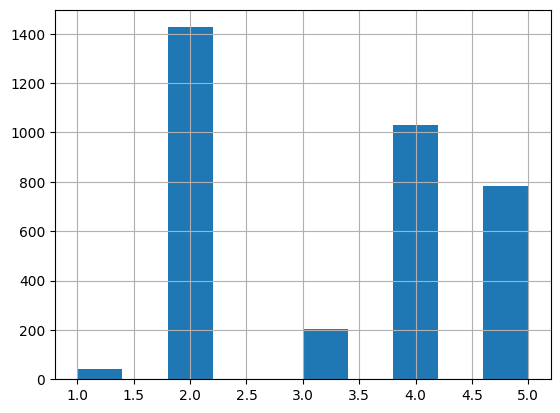

In [5]:
# Histogram of projects by rank
df['RANK'].hist()

In [6]:
for i in range(1, 6):  # Loop through ranks 1 to 5
    rank_df = df[df['RANK'] == i]  # Filter dataframe by rank
    num_projects = len(rank_df)  # Count number of projects
    total_funding = rank_df['TOTAL AWARD FUNDING AMOUNT'].sum()  # Sum funding amount
    percent_total = (total_funding / Total_funding) * 100  # Calculate percentage

    print(f"Rank {i}: {num_projects} projects, Total Funding: ${total_funding:,.2f}. "
          f"Percent of Total Funding: {percent_total:.2f}%")


Rank 1: 43 projects, Total Funding: $13,989,927.00. Percent of Total Funding: 0.68%
Rank 2: 1426 projects, Total Funding: $799,973,095.00. Percent of Total Funding: 38.86%
Rank 3: 202 projects, Total Funding: $141,510,541.00. Percent of Total Funding: 6.87%
Rank 4: 1030 projects, Total Funding: $658,845,558.00. Percent of Total Funding: 32.00%
Rank 5: 782 projects, Total Funding: $444,398,794.00. Percent of Total Funding: 21.59%


## Institutions decriptions 

In [7]:
# Institutions with most grants 
institution_counts = df['RECIPIENT PARENT NAME'].value_counts()
institution_counts.head(10)

RECIPIENT PARENT NAME
STATE OF CALIFORNIA CONTROLLERS OFFICE                           113
UNIVERSITY OF TEXAS SYSTEM                                        94
BOARD OF GOVERNERS STATE UNIVERSITY SYSTEM OF FLORIDA             82
THE UNIVERSITY OF NORTH CAROLINA                                  60
THE REGENTS OF THE UNIVERSITY OF COLORADO                         55
REGENTS OF THE UNIVERSITY OF MICHIGAN                             52
PURDUE UNIVERSITY                                                 45
RESEARCH FOUNDATION FOR THE STATE UNIVERSITY OF NEW YORK, THE     44
ARIZONA STATE UNIVERSITY                                          43
THE PENNSYLVANIA STATE UNIVERSITY                                 43
Name: count, dtype: int64

In [8]:
# Grants by Parent Name
funding_per_institution = df.groupby('RECIPIENT PARENT NAME')['TOTAL AWARD FUNDING AMOUNT'].sum()

# Sort in descending order
funding_per_institution = funding_per_institution.sort_values(ascending=False)

# Pretty print with dollar formatting
formatted_output = funding_per_institution.apply(lambda x: f"${x:,.2f}")

formatted_output.head(10)

RECIPIENT PARENT NAME
UNIVERSITY OF ILLINOIS                                           $65,969,694.00
STATE OF CALIFORNIA CONTROLLERS OFFICE                           $62,628,160.00
UNIVERSITY OF TEXAS SYSTEM                                       $55,364,074.00
ARIZONA STATE UNIVERSITY                                         $48,807,561.00
RESEARCH FOUNDATION FOR THE STATE UNIVERSITY OF NEW YORK, THE    $41,854,782.00
BOARD OF GOVERNERS STATE UNIVERSITY SYSTEM OF FLORIDA            $32,904,984.00
REGENTS OF THE UNIVERSITY OF MICHIGAN                            $30,127,858.00
MICHIGAN STATE UNIVERSITY                                        $29,768,097.00
THE REGENTS OF THE UNIVERSITY OF COLORADO                        $28,476,450.00
THE UNIVERSITY OF NORTH CAROLINA                                 $24,664,630.00
Name: TOTAL AWARD FUNDING AMOUNT, dtype: object

In [9]:
df['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

344     29399996
2401    20059355
1328    15000000
1316    15000000
1317    15000000
          ...   
785         1650
2061        1502
1556         914
25           100
870          100
Name: TOTAL AWARD FUNDING AMOUNT, Length: 3483, dtype: int64

In [10]:
# Largest grant by dollar amount 
print(df.iloc[344])
box(df.iloc[344])

TOTAL AWARD FUNDING AMOUNT                                                 29399996
RECIPIENT PARENT NAME                                        UNIVERSITY OF ILLINOIS
AWARD DESCRIPTIONS                CATEGORY I: BRIDGING THE GAP BETWEEN AI/ML COM...
SOCIAL JUSTICE CATEGORY                                                           1
RACE CATEGORY                                                                     0
GENDER CATEGORY                                                                   0
ENVIRONMENTAL JUSTICE CATEGORY                                                    0
RANK                                                                              4
REASONING                              Strong focus on accessibility and diversity.
Name: 344, dtype: object
CATEGORY I: BRIDGING THE GAP BETWEEN AI/ML COMPUTING DEMANDS AND TODAY'S
CAPABILITIES -ADVANCES IN COMPUTING HARDWARE AND IN ARTIFICIAL INTELLIGENCE (AI)
RESEARCH HAVE LED TO AI-FOCUSED SYSTEMS THAT HAVE TRANSFORMED THE

## Analyzing results based on rank 

In [11]:
rank1 = df[df['RANK']==1]
rank2 = df[df['RANK']==2]
rank3 = df[df['RANK']==3]
rank4 = df[df['RANK']==4]
rank5 = df[df['RANK']==5]

In [12]:
rank1['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

3304    999479
2072    950000
3035    750000
3176    651534
1164    599651
2254    533411
2929    515982
695     501356
907     450100
1864    438296
230     432740
2488    428000
945     393461
1170    385000
2552    380356
2781    362687
2864    326361
1548    299181
585     294993
3266    278419
460     270000
1467    266589
1439    255000
2797    251341
70      250000
1122    250000
1160    249999
1582    244203
1392    240000
1507    227611
2788    226954
613     195574
1685    156452
2816    150000
1410    138000
1415    138000
1422    138000
3084    116060
3125     73637
1898     50000
1147     50000
1626     50000
86       31500
Name: TOTAL AWARD FUNDING AMOUNT, dtype: int64

In [13]:
rank1_reasoning = rank1['REASONING'].value_counts()
rank2_reasoning = rank2['REASONING'].value_counts()
rank3_reasoning = rank3['REASONING'].value_counts()
rank4_reasoning = rank4['REASONING'].value_counts()
rank5_reasoning = rank5['REASONING'].value_counts()


In [14]:
# Rank 1: Example 1    
df.iloc[3304]
box(df.iloc[3304])
# Purpose: Mosquito research
# Flagged because keywords used "underrepreseted attributes"
# Otherwise, no content related to DEI 
# Amount: $1,000,000

SBIR PHASE II: ADVANCED COMPUTER VISION METHODS FOR DIAGNOSTIC MEDICAL
ENTOMOLOGY -THE BROADER IMPACT OF THIS SMALL BUSINESS INNOVATION RESEARCH (SBIR)
PHASE II PROJECT IS TO ENABLE THE PROVISION OF HIGH QUALITY VECTOR SURVEILLANCE
DATA TO PUBLIC HEALTH INSTITUTIONS DOMESTICALLY AND INTERNATIONALLY. VECTORS, OR
ORGANISMS THAT TRANSMIT DISEASES TO OTHER ORGANISMS, LIKE MOSQUITOES AND TICKS,
HAVE A SIGNIFICANT IMPACT ON HUMAN HEALTH AND AGRICULTURE, WITH ASSOCIATED
MORTALITY AND MORBIDITY. THIS PROJECT AIMS TO ADVANCE ARTIFICIAL INTELLIGENCE
METHODS TO IDENTIFY MOSQUITO SPECIES FROM HIGH RESOLUTION IMAGES. WHILE WELL
STUDIED AND DOCUMENTED, MOSQUITO SPECIES IDENTIFICATION REMAINS A HIGHLY SKILLED
TASK, WHERE THE FEW CAPABLE OF THIS SKILL FOR A GIVEN REGION OFTEN HAVE MANY
OTHER JOB RESPONSIBILITIES, MAKING TIME DEVOTED TO THE LABORIOUS TASK OF
MOSQUITO IDENTIFICATION DIFFICULT TO JUSTIFY AT SCALE, DESPITE THE NECESSITY OF
THE DATA CREATED. THIS PROJECT AND ITS DERIVATIVE WORKS WILL ENABL

In [15]:
# Rank 1: Example 2
df.iloc[1685]
box(df.iloc[1685])
# Purpose: Mathematical research on log concanve functions 
# Flagged because used the words "equality" and "inequality" in the mathematical sense 
# Otherwise, no content related to DEI 
# Amount: $156,000

LOG-CONCAVE INEQUALITIES IN COMBINATORICS AND ORDER THEORY -THIS PROJECT FOCUSES
ON THE FUNDAMENTAL MATHEMATICAL PHENOMENA THAT EMERGE AS A RESULT OF THE
UNDERLYING STRUCTURE OF OBJECTS THAT ARE OFTEN DIFFICULT TO DISCERN. UNIMODALITY
IS A REMARKABLE EXAMPLE OF SUCH A PHENOMENON, WHICH IS CHARACTERIZED BY THE
PRESENCE OF A SINGLE MAXIMUM OR MODE IN A STATISTICAL DISTRIBUTION. THIS
PHENOMENON HAS BEEN OBSERVED IN VARIOUS OBJECTS, INCLUDING STUDENT GRADE
DISTRIBUTIONS AND THE FREQUENCY OF EARTHQUAKES AT A SPECIFIC LOCATION. THE
PROJECT AIMS TO ANALYZE THE PRECISE MECHANISM OF THE EMERGENCE OF SUCH PHENOMENA
USING APPROACHES BASED ON RECENT ADVANCES AND TECHNIQUES IN COMBINATORICS,
PROBABILITY, AND ORDER THEORY. THE PI WILL MENTOR STUDENTS AS PART OF THIS
PROJECT. MORE TECHNICALLY, THE PROJECT DEALS WITH LOG-CONCAVE INEQUALITIES AND
CORRELATION INEQUALITIES IN COMBINATORIAL OBJECTS AND THEIR CONNECTIONS TO THE
UNDERLYING COMBINATORIAL STRUCTURE. SIGNIFICANT ADVANCEMENTS HAVE BEEN MADE IN


In [16]:
# Rank 1: Example 3
box(df.iloc[3125])
df.iloc[3125]
#Purpose: Statistical research
#Reason: Used the word 'biased' and 'unbiased' in a statistical sense 
#Amount: ~$75k

STATISTICAL INFERENCES UNDER MONOTONIC HAZARD TREND IN SURVIVAL ANALYSIS
-CORRECTLY EVALUATING THE INCREASING HAZARD RATES UNDER MORE RISKY ENVIRONMENTS
OR SEVERE CONDITIONS IS CRUCIAL FOR REDUCING MODALITIES AND FAILURE RATES.
HOWEVER, IN MANY APPLICATIONS, THE MONOTONIC RELATIONSHIPS BETWEEN HAZARD RATES
AND ENVIRONMENTS ARE MISSPECIFIED OR OMITTED AND MAY FURTHER CAUSE BIASED RISK
EVALUATION. THIS PROJECT WILL TAKE THE MONOTONIC RELATIONSHIPS SERIOUSLY TO
OBTAIN UNBIASED AND EFFICIENT STATISTICAL INFERENCES. THE PI AIMS TO DEVELOP
DISTRIBUTIONAL COMPARISONS, PARAMETER ESTIMATIONS, AND HYPOTHESIS TESTS WITH
DATA COLLECTED WITH ORDERED HAZARD RATES. THE PROPOSED METHODS CAN BE APPLIED IN
BROAD AREAS SUCH AS BIOMEDICAL, ENVIRONMENTAL, SOCIAL, AND PHYSICAL STUDIES.
THIS PROJECT WILL ALSO DEVELOP OPEN-SOURCE SOFTWARE FOR A BROADER BASE OF USERS.
THE PI WILL PROVIDE RESEARCH OPPORTUNITIES FOR UNDERGRADUATE AND GRADUATE
STUDENTS IN MODERN STATISTICS. IN ADDITION, GRADUATE-LEVEL COURSES WIL

TOTAL AWARD FUNDING AMOUNT                                                    73637
RECIPIENT PARENT NAME                                    UNIVERSITY OF TEXAS SYSTEM
AWARD DESCRIPTIONS                STATISTICAL INFERENCES UNDER MONOTONIC HAZARD ...
SOCIAL JUSTICE CATEGORY                                                           1
RACE CATEGORY                                                                     0
GENDER CATEGORY                                                                   0
ENVIRONMENTAL JUSTICE CATEGORY                                                    1
RANK                                                                              1
REASONING                                                       No clear alignment.
Name: 3125, dtype: object

In [17]:
# Rank2 examples 
rank2['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

1317    15000000
1327    15000000
1326    14999999
3132    12398000
1671    10471701
          ...   
1767        7500
541         5254
917         5000
2395        4500
785         1650
Name: TOTAL AWARD FUNDING AMOUNT, Length: 1426, dtype: int64

In [18]:
rank2_reasoning = rank2['REASONING'].value_counts()

In [19]:
box(df.iloc[1327]) # Water shortages in southweest region 

NSF ENGINES: SOUTHWEST SUSTAINABILITY INNOVATION ENGINE -THIS NSF ENGINES AWARD
TO THE SOUTHWEST SUSTAINABILITY INNOVATION ENGINE WILL ADVANCE US INNOVATION
CAPACITY IN THREE INTERRELATED AREAS OF SUSTAINABILITY: (1) WATER SECURITY, (2)
RENEWABLE ENERGY, AND (3) NET CARBON EMISSIONS. THE SOUTHWEST (SW) REGION OF THE
U.S. IS CHANGING RAPIDLY, AND LIKE MANY REGIONS AROUND THE WORLD, IS
EXPERIENCING INCREASINGLY HARSH CLIMATE CONDITIONS?WITH WIDE-RANGING IMPACTS,
FROM EXTREME WEATHER EVENTS THAT DAMAGE INFRASTRUCTURE AND POSE SERIOUS HEALTH
RISKS TO INCREASING WATER AND ENERGY INSECURITY THAT THREATEN ECONOMIC
PROSPERITY. THE SW REGION COMPRISING UTAH, NEVADA, AND ARIZONA IS ESPECIALLY
VULNERABLE DUE TO EXTREME ARIDITY AND HEAT COUPLED WITH RAPID POPULATION GROWTH
(THE 2020 U.S. CENSUS SHOWS THAT UTAH, NEVADA, AND ARIZONA ARE FIRST, FOURTH,
AND FIFTH, RESPECTIVELY, FOR POPULATION GROWTH DURING THE PERIOD FROM 2010 TO
2020). IN FACT, AS RAPID GROWTH INCREASINGLY CONFLICTS WITH SEVERE WATER

In [20]:
box(df.iloc[1671]) # American National Election Studies 

THE 2024 AMERICAN NATIONAL ELECTION STUDIES (ANES) -THE 2024 AMERICAN NATIONAL
ELECTION STUDY (ANES) WILL OCCUR AT A MOMENT OF GREAT UNCERTAINTY AND CHANGE IN
AMERICAN POLITICS. THE PUBLIC IS DIVIDED OVER LONG-STANDING POLITICAL NORMS
INVOLVING EXECUTIVE POWER, ELECTORAL LEGITIMACY, THE RULE OF LAW, AND SOCIETAL
NORMS SUCH AS THE PROPER BALANCE OF PUBLIC HEALTH CONCERNS WITH INDIVIDUAL
FREEDOMS. SINCE 1948, THE ANES HAS BEEN THE GOLD STANDARD FOR MEASURING PUBLIC
OPINION AND UNDERSTANDING VOTING BEHAVIOR IN THE UNITED STATES. THE 2024 ANES
MAINTAINS THE TRADITION OF A NONPARTISAN, SCIENTIFICALLY VALID SURVEY WHILE
ADDING CUTTING-EDGE INNOVATIONS. NEW AND EXISTING QUESTIONS ON THE ANES SURVEY
ALLOW RESEARCHERS TO UNDERSTAND THE SOURCES OF POLITICAL DISCONTENT, EXPLAIN
MISUNDERSTANDINGS BETWEEN ELECTED OFFICIALS THE PUBLIC, AND IDENTIFY
OPPORTUNITIES FOR BRIDGING THE COUNTRY'S POLITICAL AND SOCIAL DIVISIONS. THE
2024 ANES CONTINUES THE ANES TRADITION OF ADMINISTERING BOTH PRE- AND POST-


In [21]:
box(df.iloc[1767]) #Data science symposium at South Dakota State University

CONFERENCE: SDSU DATA SCIENCE SYMPOSIUM -SOUTH DAKOTA STATE UNIVERSITY WILL HOST
THE 6TH ANNUAL SDSU DATA SCIENCE SYMPOSIUM AT THE SDSU CAMPUS FROM FEBRUARY 5 TO
6, 2024. THE SYMPOSIUM BRINGS TOGETHER STUDENTS, FACULTY, RESEARCHERS, AND
INDUSTRY PROFESSIONALS WHO ENGAGE IN FOUNDATIONAL RESEARCH AND APPLICATIONS OF
DATA SCIENCE. THIS EVENT, HELD ANNUALLY SINCE 2018 (EXCLUDING 2021 DUE TO THE
COVID-19 PANDEMIC) INCLUDES PRE-CONFERENCE WORKSHOPS, KEYNOTE SPEAKERS, PARALLEL
ORAL PRESENTATIONS, UNDERGRADUATE AND GRADUATE STUDENT POSTER PRESENTATIONS AND
COMPETITIONS, AS WELL AS A CAREER FAIR. HISTORICALLY, MORE THAN 200 PARTICIPANTS
HAVE ATTENDED, INCLUDING STUDENTS FROM UP TO 16 UNIVERSITIES AND REPRESENTATIVES
FROM UP TO 23 COMPANIES. WITH THE 2024 EVENT, THIS AWARD WILL HELP EXPAND BOTH
STUDENT PARTICIPATION AND THE NUMBER OF JUNIOR SPEAKERS FROM RURAL, UNDER-
REPRESENTED, AND UNDER-SERVED AREAS OF THE MIDWEST AND BEYOND. THE FIELD OF DATA
SCIENCE IS EXPANDING AND INTERDISCIPLINARY INVOL

In [22]:
#Rank3 examples 

In [23]:
rank3_reasoning

REASONING
Contains elements of diversity and inclusion.               8
Some alignment with diversity and inclusion.                5
Touches on diversity and inclusion.                         4
Mentions diversity and inclusion.                           4
Includes diversity and inclusion initiatives.               3
                                                           ..
Touches on equality and community engagement.               1
Includes diversity and broader impact.                      1
Some focus on under-represented groups.                     1
Addresses underrepresented groups in STEM.                  1
Some alignment due to diversity in STEM workforce focus.    1
Name: count, Length: 167, dtype: int64

In [24]:
box(df.iloc[115])

LEAPS-MPS: SEARCHING FOR THE DARK SIDE OF THE UNIVERSE WITH GRAVITATIONAL WAVES
-THIS AWARD IS FUNDED IN WHOLE OR IN PART UNDER THE AMERICAN RESCUE PLAN ACT OF
2021 (PUBLIC LAW 117-2). THE STANDARD MODEL OF ELEMENTARY PARTICLES AND
COSMOLOGY DESCRIBES REMARKABLY WELL THE EVOLUTION OF THE UNIVERSE STARTING FROM
ONE-TRILLIONTH OF A SECOND AFTER THE BIG BANG UP TO THE PRESENT DAY. DESPITE
THIS HUGE SUCCESS, SEVERAL FUNDAMENTAL QUESTIONS REMAIN UNANSWERED: WHAT IS DARK
MATTER? WHY IS THERE MORE MATTER THAN ANTIMATTER IN THE UNIVERSE? WHY ARE
NEUTRINOS MASSIVE? SOLVING THESE MYSTERIES REQUIRES AN UNDERSTANDING OF WHAT
HAPPENED BEFORE ONE-TRILLIONTH OF A SECOND AFTER THE BIG BANG. THE TOOL ENABLING
US TO DIVE THIS FAR BACK INTO THE UNIVERSE'S HISTORY HAS ONLY RECENTLY BEEN
PROVIDED BY THE FIRST SUCCESSFUL DETECTION OF GRAVITATIONAL WAVES. A PRIMORDIAL
STOCHASTIC GRAVITATIONAL WAVE BACKGROUND, ALTHOUGH NOT YET DISCOVERED, IS
EXPECTED TO CARRY INFORMATION PRECISELY ABOUT THE VERY EARLY PERIOD 

In [25]:
# Rank3 examples 
rank3['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

2401    20059355
1316    15000000
3395     4986777
2680     3828396
3327     3749415
          ...   
673        10000
3254       10000
916         5000
3178        5000
1518        3168
Name: TOTAL AWARD FUNDING AMOUNT, Length: 202, dtype: int64

In [26]:
box(df.iloc[2401]) # Focus on recruiting students from underrepresented groups 

TRACK 3: CORE NATIONAL ECOSYSTEM FOR CYBERINFRASTRUCTURE (CONECT) -THE
UNIVERSITY OF ILLINOIS AT URBANA-CHAMPAIGN TEAM PROVIDES OPERATIONS AND
INTEGRATION SERVICES AS PART OF THE ADVANCED CYBERINFRASTRUCTURE COORDINATION
ECOSYSTEM: SERVICES & SUPPORT (ACCESS) PROGRAM. SCIENCE AND ENGINEERING RESEARCH
AND EDUCATION INCREASINGLY RELIES ON A SEAMLESSLY INTEGRATED, SECURE, AND ROBUST
ECOSYSTEM OF ADVANCED COMPUTING AND DATA TECHNOLOGIES AND HUMAN EXPERTISE. THE
CORE NATIONAL ECOSYSTEM FOR CYBERINFRASTRUCTURE (CONECT) PROJECT DELIVERS
INNOVATIVE INTEGRATIONS ACROSS THE NSF-FUNDED CYBERINFRASTRUCTURE ECOSYSTEM IN
THE AREAS OF OPERATIONS, DATA AND NETWORKING, AND CYBERSECURITY. CONECT USES
AGILE MECHANISMS TO INTEGRATE THE RAPIDLY DIVERSIFYING SET OF NON-TRADITIONAL
RESOURCES THAT PREVIOUSLY HAVE BEEN LEFT ON THE FRINGES OF THE NATIONAL
CYBERINFRASTRUCTURE. CONECT BUILDS UPON THE SUCCESSES OF ITS PREDECESSORS AND
MOVES TOWARD A MORE AGILE, DYNAMIC, AND INCLUSIVE ECOSYSTEM. CONECT INTRODUCES
A

In [27]:
box(df.iloc[1316])

NSF ENGINES: LOUISIANA ENERGY TRANSITION ENGINE -THIS NSF ENGINES AWARD TO THE
LOUISIANA ENERGY TRANSITION ENGINE WILL ADVANCE OUR NATION?S CAPACITY FOR
INNOVATION IN CLEAN ENERGY BY DRIVING RESEARCH AND COMMERCIALIZATION EFFORTS IN
CARBON CAPTURE, HYDROGEN AS AN ALTERNATIVE FUEL, CARBON DIOXIDE AS A FEEDSTOCK,
SUSTAINABLE WATER, SUSTAINABLE MANUFACTURING FOR CLEAN ENERGY, AND ECONOMIC AND
POLICY RESEARCH TO PROMOTE PATHWAYS TO DECARBONIZATION IN THE STATE OF
LOUISIANA. CLEAN ENERGY TECHNOLOGIES WILL SURPASS THE CURRENT STATE OF PRACTICE
AND OUR CURRENT CAPABILITIES BECAUSE OF THE UNIQUE CAPACITY OF THIS NSF ENGINE
TO LEVERAGE LOUISIANA?S UNIQUE GEOLOGY, ITS EXISTING OIL AND GAS PRODUCTION AS
WELL AS DOWNSTREAM PETROCHEMICAL OPERATIONS, AND ITS STRONG RESEARCH AND
DEVELOPMENT INFRASTRUCTURE. THIS WILL HAVE PROFOUND IMPACTS ON OUR NATIONAL
ECONOMY AND SECURITY, AND IT WILL INCREASE THE NATION?S ABILITY TO COMPETE ON A
GLOBAL STAGE AS THE WORLD RACES TO FIND MORE SUSTAINABLE ENERGY SOLUT

In [28]:
#Rank4
rank4['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

344     29399996
1289    15000000
1328    15000000
2833    12790178
2775    12244454
          ...   
67          5000
2366        5000
3418        4910
2061        1502
1556         914
Name: TOTAL AWARD FUNDING AMOUNT, Length: 1030, dtype: int64

In [29]:
df.iloc[344]
#box(df.iloc[344])

TOTAL AWARD FUNDING AMOUNT                                                 29399996
RECIPIENT PARENT NAME                                        UNIVERSITY OF ILLINOIS
AWARD DESCRIPTIONS                CATEGORY I: BRIDGING THE GAP BETWEEN AI/ML COM...
SOCIAL JUSTICE CATEGORY                                                           1
RACE CATEGORY                                                                     0
GENDER CATEGORY                                                                   0
ENVIRONMENTAL JUSTICE CATEGORY                                                    0
RANK                                                                              4
REASONING                              Strong focus on accessibility and diversity.
Name: 344, dtype: object

In [30]:
rank4_reasoning

REASONING
Strong emphasis on diversity and inclusion.             190
Strong focus on diversity and inclusion.                 96
Strong focus on equity and inclusion.                    42
Strong emphasis on equity and inclusion.                 27
Strong alignment with diversity and inclusion goals.     12
                                                       ... 
Strong focus on equity and community.                     1
Strong focus on cultural responsiveness and equity.       1
Strongly aligned with DEI and equity goals.               1
Strong focus on gender and underrepresentation.           1
Strong alignment with equity focus.                       1
Name: count, Length: 451, dtype: int64

In [31]:
box(df.iloc[26]) # Focus on Historically Black Colleges and Minority Serving Institutions 

TRAVEL: TRAVEL SUPPORT FOR STUDENTS FROM HISTORICALLY BLACK COLLEGES AND
UNIVERSITIES (HBCUS) AND MINORITY SERVING INSTITUTIONS (MSIS) TO THE 2022
PHYSICS CONGRESS -THE 2022 PHYSICS CONGRESS (PHYSCON), ORGANIZED BY SIGMA PI
SIGMA (THE PHYSICS HONOR SOCIETY) AND SUPPORTED BY THE AMERICAN INSTITUTE OF
PHYSICS (AIP), IS THE LARGEST SINGLE GATHERING OF PHYSICS UNDERGRADUATE STUDENTS
IN THE WORLD. THIS AWARD TO AIP SUPPORTS THE ATTENDANCE TO THIS MEETING BY
MEMBERS OF UNDERREPRESENTED GROUPS IN PHYSICS. THIS YEAR?S CONFERENCE, THEMED
100 YEARS OF MOMENTUM, WILL INCLUDE KEYNOTE LECTURES BY RENOWNED SCIENTISTS;
INTERACTIVE WORKSHOPS ON KEY TOPICS OF IMPORTANCE TO UNDERGRADUATES IN THE
PHYSICAL SCIENCES; AND TOURS OF MAJOR SCIENCE FACILITIES TO PROVIDE
TRANSFORMATIVE EXPERIENCES FOR THE STUDENTS. AFRICAN AMERICANS AND HISPANICS ARE
BOTH EXTREMELY UNDERREPRESENTED IN PHYSICS. ACCORDING TO 2020 U.S. CENSUS DATA,
16% OF THE 20?24-YEAR-OLDS IN THE U.S. ARE AFRICAN AMERICAN AND 22.3% ARE
HISPANIC. 

In [32]:
box(df.iloc[3022])

PROMOTING EARLY RETENTION OF STEM STUDENTS: ACHIEVING CHANGE IN OUR COMMUNITIES
THROUGH EQUITY AND STUDENT SUCCESS IN STEM -THIS PROJECT WILL CONTRIBUTE TO THE
NATIONAL NEED FOR WELL-EDUCATED SCIENTISTS, MATHEMATICIANS, ENGINEERS, AND
TECHNICIANS BY SUPPORTING THE RETENTION AND GRADUATION OF HIGH-ACHIEVING, LOW-
INCOME STUDENTS WITH DEMONSTRATED FINANCIAL NEED AT THE UNIVERSITY OF WASHINGTON
(UW) TACOMA. UW TACOMA IS AN ASIAN AMERICAN, NATIVE AMERICAN, AND PACIFIC
ISLANDER-SERVING INSTITUTION (AANAPISI). OVER ITS SEVEN-YEAR DURATION, THIS
PROJECT WILL FUND SCHOLARSHIPS 48 UNIQUE FULL-TIME STUDENTS WHO ARE PURSUING
BACHELOR?S DEGREES IN MATHEMATICS, ENVIRONMENTAL SCIENCE, BIOMEDICAL SCIENCES,
INFORMATION TECHNOLOGY, COMPUTER SCIENCE AND SYSTEMS, COMPUTER ENGINEERING AND
SYSTEMS, ELECTRICAL ENGINEERING, MECHANICAL ENGINEERING, OR CIVIL ENGINEERING.
FIRST-TIME COLLEGE STUDENTS AND FIRST-YEAR TRANSFER STUDENTS WILL RECEIVE FULL
SCHOLARSHIPS FOR THEIR FIRST TWO YEARS AND PARTIAL SCHOLARSHIP

In [33]:
#Rank5
rank5['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

3330    9278960
3409    7825594
2373    5681900
2736    5085148
2079    4421998
         ...   
213        8356
1197       8144
2298       8045
25          100
870         100
Name: TOTAL AWARD FUNDING AMOUNT, Length: 782, dtype: int64

In [34]:
rank5.sample(3, random_state=42)

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
2646,342171,UNIVERSITY OF WASHINGTON,CAREER: LANGUAGE TECHNOLOGIES AGAINST THE LANG...,1,1,1,0,5,Strongly aligns with DEI and social justice.
2629,300000,NaN,THE YOUNG BLACK GIRL: INFLUENCING SCIENCE INTE...,0,1,1,0,5,"Heavily emphasizes social justice, diversity, ..."
828,368648,"LOYOLA UNIVERSITY MARYLAND, INC.","RECRUITING, PREPARING, AND RETAINING CULTURALL...",1,0,0,0,5,Strongly aligns with woke ideology.


In [35]:
box(df.iloc[2646])

CAREER: LANGUAGE TECHNOLOGIES AGAINST THE LANGUAGE OF SOCIAL DISCRIMINATION
-THIS AWARD IS FUNDED IN WHOLE OR IN PART UNDER THE AMERICAN RESCUE PLAN ACT OF
2021 (PUBLIC LAW 117-2). THE EXPONENTIAL GROWTH OF ONLINE SOCIAL PLATFORMS
PROVIDES AN UNPRECEDENTED SOURCE OF EQUAL OPPORTUNITIES FOR ACCESSING EXPERT-
AND CROWD-WISDOM, FOR FINDING EDUCATION, EMPLOYMENT, AND FRIENDSHIPS. ONE KEY
ROOT CAUSE THAT CAN DEEPLY IMPEDE THESE EXPERIENCES IS THE EXPOSURE TO IMPLICIT
SOCIAL BIAS. THE RISK IS HIGH, SINCE BIASES ARE PERNICIOUS AND PERVASIVE, AND IT
HAS BEEN WELL ESTABLISHED THAT LANGUAGE IS A PRIMARY MEANS THROUGH WHICH
STEREOTYPES AND PREJUDICE ARE COMMUNICATED AND PERPETUATED. THIS PROJECT
DEVELOPS LANGUAGE TECHNOLOGIES TO DETECT AND INTERVENE IN THE LANGUAGE OF SOCIAL
DISCRIMINATION?SEXIST, RACIST, HOMOPHOBIC MICROAGGRESSIONS, CONDESCENSION,
OBJECTIFICATION, DEHUMANIZING METAPHORS, AND THE LIKE?WHICH CAN BE UNCONSCIOUS
AND UNINTENTIONAL, BUT CAUSE PROLONGED PERSONAL AND PROFESSIONAL HARMS.

In [36]:
box(df.iloc[2629])

THE YOUNG BLACK GIRL: INFLUENCING SCIENCE INTEREST AND COMMITMENT TO STEM
THROUGH THE MERGING OF LIVED EXPERIENCES OF LEARNERS IN AN OUT-OF-SCHOOL PROGRAM
-THIS AWARD IS FUNDED IN WHOLE OR IN PART UNDER THE AMERICAN RESCUE PLAN ACT OF
2021 (PUBLIC LAW 117-2). BLACK WOMEN MAKE UP THE SMALLEST PERCENTAGE OF PERSONS
IN STEM CAREERS. GIRLS AGED THREE THROUGH FOURTEEN YEARS OLD, REGARDLESS OF
ETHNICITY, CONSIDER SCIENCE OCCUPATIONS AS UNACHIEVABLE AT HIGHER RATES THAN
OTHER GROUPS BECAUSE THEY SENSE THAT THESE OCCUPATIONS ARE INAPPROPRIATE FOR
GIRLS. PRIOR RESEARCH ALSO INDICATES THAT FACTORS INFLUENCING BLACK GIRLS TO
CONSIDER STEM MAJORS AND CAREERS INCLUDE INTEREST IN THE SCIENCE BEING STUDIED,
THE LEARNER'S OWN SENSE OF IDENTITY, AND WHETHER INTEREST CAN BE SUSTAINED. THIS
PROJECT AIMS TO DEVELOP AN INFORMAL LEARNING PROGRAM DESIGNED AS A VENUE THROUGH
WHICH BLACK GIRLS TELL STEM EDUCATORS AND RESEARCHERS ABOUT THE SCIENCE
ACTIVITIES THAT PROPEL THEIR INTERESTS AND PARTICIPATION. THE AS

In [37]:
box(df.iloc[828])

RECRUITING, PREPARING, AND RETAINING CULTURALLY RESPONSIVE AND EQUITY-MINDED
STEM TEACHERS FOR HIGH-NEED SCHOOLS -THIS PROJECT WILL ADDRESS A CRITICAL
TEACHER SHORTAGE IN MARYLAND?S URBAN, LOW-INCOME, AND RURAL SCHOOLS. TOWARDS
THIS END THE PROJECT WILL RECRUIT AND PREPARE 28 SECONDARY STEM TEACHERS FOR
TEACHER CERTIFICATION, LEADING TO CAREERS IN HIGH-NEED SCHOOLS. TO HELP
DIVERSIFY THE TEACHER POOL, THE PROJECT LEADERS WILL PLACE PARTICULAR ATTENTION
ON RECRUITING AND RETAINING TEACHERS OF COLOR AND THOSE FROM OTHER GROUPS WHO
ARE SIMILARLY UNDERREPRESENTED IN THEIR PARTICIPATION IN THE STEM TEACHER
PROFESSION. MAJOR PROJECT FEATURES INCLUDE: (1) INTEGRATION OF CULTURALLY
RESPONSIVE TEACHING AND AMBITIOUS MATH AND SCIENCE TEACHING INTO A MASTER OF
ARTS IN TEACHING (MAT) CURRICULUM; (2) OFFERING A CULTURALLY RESPONSIVE
EQUITABLE STEM TEACHING (CREST) SEMINAR; AND (3) IMPLEMENTATION OF A CREST
INDUCTION SERIES. BY SUPPORTING IMPROVEMENTS TO THE MAT PROGRAM, OFFERING
SCHOLARSHIPS AND ST

## Additional results

In [38]:
## REU sites funding 
df_reu = df[df["AWARD DESCRIPTIONS"].str.contains("REU SITE", case=False, na=False)]
df_reu      

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
163,402120,BOARD OF REGENTS OF UNIVERSITY OF NEBRASKA,REU SITE: COMMUNITY-ENGAGED TRAINING FOR ADVAN...,1,0,0,0,5,"Heavily emphasizes equity, diversity, and comm..."
167,331568,BOARD OF REGENTS OF UNIVERSITY OF NEBRASKA,REU SITE: DIGITAL LEGAL RESEARCH LAB -THIS PRO...,1,0,0,0,4,Strong alignment with social justice and diver...
184,26010,NaN,COLLABORATIVE RESEARCH: REU SITE: WATER RESOUR...,1,0,0,0,4,Strong emphasis on diversity and inclusion.
193,17726,THE UNIVERSITY OF NORTH CAROLINA,COLLABORATIVE RESEARCH: CONFERENCE: 2022 CISE ...,1,0,0,0,4,Strong alignment with diversity and inclusion ...
194,431438,NaN,COLLABORATIVE RESEARCH: CONFERENCE: 2022 CISE ...,1,0,0,0,4,Strong focus on equity and inclusion.
...,...,...,...,...,...,...,...,...,...
3351,360000,VIRGINIA STATE UNIVERSITY,REU SITE: STUDENTS TRANSFORMING ENERGY AND ENV...,1,0,0,1,2,Minimal direct alignment; focuses on STEM rese...
3377,436092,"WASHINGTON UNIVERSITY, THE",REU SITE: THERMAL ENERGY MANAGEMENT ON MULTIPL...,0,0,1,0,4,Strong emphasis on diversity and inclusion.
3434,654872,WILLIAM MARSH RICE UNIVERSITY,REU SITE: CLIMATE AND SUSTAINABILITY RESEARCH ...,1,0,0,1,4,Strong focus on diversity and inclusion.
3444,400000,WILLIAM MARSH RICE UNIVERSITY,REU SITE: TRANSLATING RESEARCH IN THE PSYCHOLO...,1,0,0,0,2,"Mentions diversity, but focuses on broader sci..."


In [39]:
reu_funding = df_reu['TOTAL AWARD FUNDING AMOUNT'].sum()
print(f"{len(df_reu)} projects, Total REU sites: ${reu_funding:,.2f}")

129 projects, Total REU sites: $52,649,157.00


In [40]:
df_reu['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

3164    2990135
2299    2172600
3434     654872
1910     598311
3204     530737
         ...   
582      106116
1114      63630
1608      39206
184       26010
193       17726
Name: TOTAL AWARD FUNDING AMOUNT, Length: 129, dtype: int64

In [41]:
#Note: highest grant is not an REU site 
#Total minus highest one ~$50million 
box(df.iloc[3164])

NRT-AI: AI ADVANCEMENTS AND CONVERGENCE IN COMPUTATIONAL, ENVIRONMENTAL, AND
SOCIAL SCIENCES (AI-ACCESS) -EMERGING AI AND COMPUTATIONAL TOOLS HAVE THE
POTENTIAL TO BRING ABOUT SIGNIFICANT TRANSFORMATION OF SCIENTIFIC PRACTICE,
ESPECIALLY IN THE ENVIRONMENTAL AND SOCIAL SCIENCES. IN FACT, THE VERY NATURE OF
IMPORTANT QUESTIONS IN THOSE FIELDS ARE THEMSELVES SHIFTING AS SOCIAL SYSTEMS
ARE INCREASINGLY EMBEDDED WITHIN COMPUTATIONAL PLATFORMS THAT MEDIATE DAILY
HUMAN ACTIVITY. HOWEVER, WHILE HUGE DATASETS ARE RAPIDLY BECOMING COMMONPLACE
ACROSS THE ENVIRONMENTAL AND SOCIAL SCIENCES, THE RIGHT METHODS FOR
UNDERSTANDING DATA GENERATED BY HUMAN BEHAVIOR, AS WELL AS ACCESSIBLE TOOLS FOR
STUDYING THEM, ARE LACKING. IN RESPONSE TO THIS URGENT NEED, THIS NATIONAL
SCIENCE FOUNDATION RESEARCH TRAINEESHIP (NRT) AWARD ESTABLISHES THE AI
ADVANCEMENTS AND CONVERGENCE IN COMPUTATIONAL, ENVIRONMENTAL, AND SOCIAL
SCIENCES (AI-ACCESS) NRT PROGRAM AT WASHINGTON UNIVERSITY IN ST. LOUIS (WASHU)
IN COLLABORATI

In [42]:
# 2nd highest is an REU site 
#box(df.iloc[2299])

In [43]:
#Machine Learning keywords
df_Machine = df[df["AWARD DESCRIPTIONS"].str.contains("Machine learning", case=False, na=False)]
df_Machine

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
49,746097,ARIZONA STATE UNIVERSITY,CRITICAL ASPECTS OF SUSTAINABILITY (CAS)-CLIMA...,1,0,0,1,4,"Strong emphasis on equity, diversity, and incl..."
70,250000,ARIZONA STATE UNIVERSITY,COLLABORATIVE RESEARCH: SATC: CORE: SMALL: SEC...,0,0,1,0,1,"Primarily technical, minimal social justice al..."
80,202896,ARIZONA STATE UNIVERSITY,COLLABORATIVE RESEARCH: A METAMODELING MACHINE...,0,0,1,0,2,Primarily focused on scientific research.
96,275000,NaN,SBIR PHASE I: A BLOOD TEST TO DETECT CEREBRAL ...,0,0,0,0,2,Minor emphasis on underserved populations.
169,85662,BOARD OF REGENTS OF UNIVERSITY OF NEBRASKA,CRII: NETS: RUI: FUNDAMENTALS OF WIRELESS NETW...,1,0,0,0,2,"Primarily technology-focused, minimal social j..."
...,...,...,...,...,...,...,...,...,...
3398,349681,WEST VIRGINIA STATE UNIVERSITY,COLLABORATIVE RESEARCH: CISE-MSI: DP: III: INF...,1,0,0,0,4,Strong focus on diversity and inclusion.
3402,249999,NaN,COLLABORATIVE RESEARCH: CISE-MSI: DP: III: INF...,1,0,0,0,4,Strong focus on diversity and inclusion.
3433,300000,NaN,COLLABORATIVE RESEARCH: CONTROLLING METAL-OXID...,0,0,1,1,2,Primarily focused on scientific research.
3451,400312,THE UNIVERSITY OF ALABAMA SYSTEM,"CAREER: TOWARDS FUNDAMENTALS OF ADAPTIVE, COLL...",1,0,1,0,2,Mentions diversity in STEM.


In [44]:
box(df.iloc[96])
# Train a model to detect cerebral aneurysms 
# $275,000
# Mentions can benefit minority populations 

SBIR PHASE I: A BLOOD TEST TO DETECT CEREBRAL ANEURYSMS -THIS SMALL BUSINESS
INNOVATION RESEARCH (SBIR) PHASE I PROJECT IS EXPECTED TO ADVANCE THE DIAGNOSIS
AND TREATMENT OF CEREBRAL ANEURYSM (CA). CAS AFFECT 2-5% OF THE POPULATION.
NEARLY 30,000 AMERICANS EACH YEAR SUFFER CA RUPTURE WITHOUT WARNING, RESULTING
IN APPROXIMATELY 50% MORTALITY. CAS ARE LARGELY ASYMPTOMATIC, AND THEREFORE
USUALLY UNDETECTED UNTIL RUPTURED. BY PROVIDING THE FIRST BLOOD TEST ABLE TO
DETECT AND EVALUATE CAS, THIS PROJECT WILL ENABLE MONITORING AT FREQUENCIES NOT
POSSIBLE TODAY. THE TECHNOLOGY WILL ALSO OFFER A DYNAMIC RUPTURE RISK SCORE THAT
CAN BE INTEGRATED INTO THE PATIENT CARE ROUTINE TO BETTER GUIDE PREOPERATIVE,
INVASIVE DIAGNOSIS AND SURGICAL INTERVENTIONS. DECREASED TESTING COSTS ENABLED
BY THIS TECHNOLOGY WILL PROMOTE MORE REGULAR MONITORING AND EARLY ACTION,
BENEFITING MINORITIES AND OTHER GROUPS WITH LOWER SOCIOECONOMIC STATUS WHO
STRUGGLE TO ACCESS PREVENTATIVE HEALTHCARE. ULTIMATELY, THIS PROJECT

In [45]:
df_Machine['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

1317    15000000
3268     7475000
3001     5720577
3331     4500000
2680     3828396
          ...   
2263       16875
1690       15524
220        15000
668        15000
2974       15000
Name: TOTAL AWARD FUNDING AMOUNT, Length: 349, dtype: int64

In [46]:
df_Machine['TOTAL AWARD FUNDING AMOUNT'].sum()

np.int64(202926233)

In [47]:
box(df.iloc[1317])

NSF ENGINES: NORTH DAKOTA ADVANCED AGRICULTURE TECHNOLOGY ENGINE -THE NORTH
DAKOTA ADVANCED AGRICULTURE TECHNOLOGY ENGINE WILL ADVANCE OUR NATION?S CAPACITY
FOR INNOVATION IN ADVANCED AGRICULTURE BY DRIVING RESEARCH AND COMMERCIALIZATION
EFFORTS TO INCREASE THE GROWTH OF EXISTING CROPS, INTRODUCING NEW CROPS, AND
MONITORING AND OPTIMIZING CROP GROWTH IN NORTH DAKOTA. THE NSF ENGINE?S FOCUS ON
COMBINING ADVANCED CROP DATA, GENETIC DATA, CLIMATE MODELING AND SENSOR
TECHNOLOGIES WILL SURPASS THE CURRENT STATE OF PRACTICE AND OUR CURRENT
CAPABILITIES. THE UNIQUE CAPACITY OF THIS NSF ENGINE AND REGION WILL APPLY
CUTTING-EDGE TECHNOLOGIES TO PUBLIC CROPS THAT ARE CRITICALLY IMPORTANT TO THE
REGION AND NATION?S ECONOMY YET HAVE HAD HISTORICAL UNDERINVESTMENT. THE NSF
ENGINE TEAM PROPOSES USING REAL-TIME DECISION MAKING AND ADVANCED TECHNOLOGIES
TO SIGNIFICANTLY INCREASE THE PACE OF INNOVATION AROUND CROP-RELATED DECISION
MAKING IN THE AGRICULTURE SPACE, REFERRING TO THIS AS ?INNOVATING AT THE

In [48]:
# Contains small business innovation research 
df_SMIR = df[df["AWARD DESCRIPTIONS"].str.contains("SMALL BUSINESS INNOVATION RESEARCH", case=False, na=False)]
df_SMIR['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)


2775    12244454
765      1018000
129      1000000
3304      999479
1136      995338
692       991408
718       985389
1938      295000
1754      295000
240       295000
585       294993
244       294880
1256      294471
3361      276000
682       276000
182       275937
45        275000
224       275000
96        275000
507       275000
933       275000
12        274996
808       274993
1253      274981
1324      255719
1233      250104
Name: TOTAL AWARD FUNDING AMOUNT, dtype: int64

In [49]:
df_SMIR['TOTAL AWARD FUNDING AMOUNT'].sum()

np.int64(23537142)

In [50]:
box(df.iloc[2775])

NSF ENTREPRENEURIAL FELLOWSHIPS FOR INCREASED DIVERSITY AND IMPACT -THIS EFFORT
SEEKS TO LAY THE PROGRAMMATIC UNDERPINNINGS FOR A LARGER-SCALE NATIONAL
ENTREPRENEURIAL ECOSYSTEM TO SUPPORT AND MENTOR SCIENTISTS AND ENGINEERS IN
THEIR EFFORTS TO LAUNCH NEW HIGH-IMPACT VENTURES BASED ON DEEP TECHNOLOGY
INNOVATIONS. THE PROJECT WILL DIRECTLY EMPOWER A RACIALLY, GEOGRAPHICALLY, AND
GENDER DIVERSE SET OF NEW TRANSLATIONAL SCIENCE AND ENGINEERING LEADERS
ADVANCING CUTTING-EDGE TECHNOLOGY INNOVATIONS ACROSS SECTORS CRITICAL TO
ECONOMIC SECURITY AND COMPETITIVENESS, INCLUDING AGRICULTURE, BUILDINGS,
CHEMICALS, COMPUTING, DEFENSE, ELECTRICITY, MANUFACTURING, AND TRANSPORTATION.
SUCCESS IN THIS EFFORT MAY VALIDATE A NATIONAL MODEL FOR DEVELOPING AND
MAINTAINING A STRONG TRANSLATIONAL RESEARCH TALENT POOL WHILE ADVANCING EMERGING
INDUSTRIES, ADDRESSING CRITICAL SOCIETAL AND ECONOMIC CHALLENGES, ENHANCING U.S.
COMPETITIVENESS AND ECONOMIC AND NATIONAL SECURITY, AND ENABLING MORE
PARTICIPATION FROM

In [51]:
# Doctoral dissertation grants revoked 
df_doctoral = df[df["AWARD DESCRIPTIONS"].str.contains("DOCTORAL DISSERTATION RESEARCH", case=False, na=False)]

In [52]:
len(df_doctoral)

56

In [53]:
# Note first one is not a disseration grant, total = 55 
df_doctoral['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

1466    942221
947      58000
740      38250
2854     38125
1062     35533
1271     33753
1958     31950
1196     31736
2391     31500
86       31500
2789     31500
3368     31500
505      31487
1524     31189
761      30731
3252     30696
2608     30500
1896     30091
2413     30044
1850     28202
2605     27325
1959     25392
142      25200
1266     25200
2495     25200
3480     25200
2514     25175
607      25170
608      25132
2099     25000
1954     25000
333      24998
1001     24984
2189     23475
1960     22371
462      22340
3470     21975
2931     20926
1961     20782
2367     20549
1955     19987
2878     19427
2703     19000
176      17111
1962     16786
60       16724
2637     15763
14       15632
16       15550
201      14095
2253     14041
179      12275
1465     11853
1168     10714
1197      8144
1517      7988
Name: TOTAL AWARD FUNDING AMOUNT, dtype: int64

In [54]:
df_doctoral['RANK'].sort_values(ascending=False)

201     5
761     5
1266    5
1197    5
1168    5
462     5
505     5
3470    5
2637    5
1196    4
1465    4
179     4
16      4
176     4
947     4
608     4
1958    4
1955    4
2253    4
2099    4
1524    4
1850    4
740     4
14      4
3252    4
2789    4
2878    4
2854    4
2514    4
2608    4
1962    4
1959    4
2495    4
2605    3
2391    3
2367    3
1960    3
1466    3
1001    3
333     2
2189    2
1271    2
607     2
1062    2
142     2
60      2
1517    2
1896    2
2703    2
1961    2
1954    2
2413    2
3368    2
2931    2
3480    2
86      1
Name: RANK, dtype: int64

In [55]:
# Dissertation research that actually studies misgender 
box(df.iloc[201])

DOCTORAL DISSERTATION RESEARCH: LEARNING AND PROCESSING MECHANISMS FOR SINGULAR
THEY/THEM PRONOUNS -THE USE OF THE PRONOUN ?THEY? INSTEAD OF SINGULAR ?HE? OR
?SHE? TO REFER TO A LONE INDIVIDUAL HAS MET WITH MIXED ACCEPTANCE FOR A VARIETY
OF PURPOSES AND CAN BE CHALLENGING FOR SOME LISTENERS AND SPEAKERS DESPITE THE
FACT THAT, HISTORICALLY, SINGULAR-THEY IS WELL ENTRENCHED IN THE LANGUAGE. FOR
EXAMPLE, MANY PEOPLE WHO DON'T INTEND TO MISGENDER OTHERS STILL MAKE ERRORS IN
THEIR ACTUAL LANGUAGE PRODUCTION. ERRORS ARE PARTICULARLY COMMON WITH SINGULAR
THEY, WHICH IS BECOMING MORE COMMON AND MORE ACCEPTED (46% OF YOUNGER AMERICANS
IN 2021 KNOW SOMEONE WHO USES THEY/THEM PRONOUNS, UP FROM 32% IN 2018), BUT IS
STILL NEW TO MANY SPEAKERS. THIS PROJECT ASKS WHY ERRORS LIKE THESE OCCUR, AND
TESTS LEARNING STRATEGIES AND SPEECH PRODUCTION OUTCOMES. THIS PROJECT DRAWS ON
SENTENCE PROCESSING, SPEECH PRODUCTION, PERSPECTIVE-TAKING, AND ERROR-BASED
LEARNING APPROACHES TO ASK NOVEL QUESTIONS ABOUT MEC

In [56]:
df_misgender = df[df["AWARD DESCRIPTIONS"].str.contains("misgender", case=False, na=False)]
df_misgender

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
201,14095,"VANDERBILT UNIVERSITY, THE",DOCTORAL DISSERTATION RESEARCH: LEARNING AND P...,0,0,1,0,5,Strongly aligns with woke culture.


In [57]:
df_indigenous = df[df["AWARD DESCRIPTIONS"].str.contains("indigenous", case=False, na=False)]
df_indigenous

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
9,131606,WORCESTER POLYTECHNIC INSTITUTE,"SRS RN: TO BE TRULY REGENERATIVE, WE MUST BE R...",0,1,0,0,5,"Strongly aligns with social justice, equity, a..."
11,49963,ILLINOIS INSTITUTE OF TECHNOLOGY,CIVIC-PG TRACK B: COMMUNITY FOOD MOBILIZATION ...,1,1,0,0,5,"Strongly aligned with social justice, equity, ..."
28,647311,NaN,THE WIND RIVER ELEMENTARY COMPUTER SCIENCE COL...,1,1,0,0,4,Strong focus on cultural responsiveness and eq...
62,49550,ECOLOGICAL SOCIETY OF AMERICA INC,CONFERENCE: ELEVATING INDIGENOUS KNOWLEDGES IN...,1,1,0,0,4,Strong emphasis on indigenous knowledge and so...
63,299103,UNIVERSITY OF ALASKA SYSTEMS,CONFERENCE: ENHANCING ARCTIC SCIENCE AND ENGIN...,1,1,0,0,4,Strong emphasis on inclusion and collaboration.
...,...,...,...,...,...,...,...,...,...
3410,100000,WESTED,CONFERENCE: INCLUDES: CULTUREWISE PATHWAYS TO ...,1,0,0,0,5,Strong alignment with DEI and social justice g...
3438,2499950,NaN,"BUILDING A RESILIENCE-FOCUSED, SOCIAL-EMOTIONA...",1,0,0,0,4,Strong emphasis on equity and inclusion.
3445,260000,WILLIAM MARSH RICE UNIVERSITY,CAREER: IDENTIFYING EMERGENT DYNAMICS IN STOCH...,1,1,0,0,3,Some focus on under-represented groups.
3458,8464,WOODS HOLE OCEANOGRAPHIC INSTITUTION,COLLABORATIVE RESEARCH: RAPID: BIOGEOCHEMISTRY...,0,1,1,0,2,"Environmental science, minor diversity mention."


In [58]:
df_indigenous['TOTAL AWARD FUNDING AMOUNT'].sum()

np.int64(128326946)

In [59]:
df_indigenous['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False)

1317    15000000
2153     6386914
426      5000000
2259     3170876
2794     3150000
          ...   
2878       19427
3255       15586
179        12275
3253       10598
3458        8464
Name: TOTAL AWARD FUNDING AMOUNT, Length: 190, dtype: int64

In [60]:
box(df.iloc[2153])

ESTABLISHING AN ENVIRONMENTAL AND NATURAL RESOURCES TECHNOLOGY CENTER
-ENVIRONMENTAL TECHNOLOGIES (ET) IS A CAREER FIELD THAT APPLIES MATH, SCIENCE,
TECHNOLOGY, ECONOMICS, ENGINEERING, LAW AND COMMUNICATION TO MANAGE, PROTECT AND
SUSTAIN NATURAL RESOURCES AND TO ENSURE HUMAN HEALTH AND SAFETY. ENVIRONMENTAL
TECHNICIANS ARE A PART OF HOMELAND SECURITY IN THE PROTECTION OF OUR COUNTRY?S
AIR, WATER AND SOIL AND AN IMPORTANT PART OF THE MAJOR ENVIRONMENTAL ISSUES OF
GLOBAL WARMING AND WATER POLLUTION. ET WILL ALSO RESHAPE PEDAGOGY AND HANDS-ON
DELIVERY OF LEARNING IN THE POST-COVID ?NEW NORMAL,? AS WELL AS BECOME PART OF
THE SOLUTION FOR HEALTH AND SAFETY ISSUES IN THE WORKPLACE FOLLOWING ANY OTHER
INFECTIOUS DISEASE PANDEMIC. ET JOBS CANNOT BE OUTSOURCED AND SURVIVE ECONOMIC
DOWNTURN. MAJOR INDUSTRIES THAT EMPLOY ENVIRONMENTAL TECHNICIANS INCLUDE
ENGINEERING SERVICES, LOCAL AND STATE GOVERNMENT, CONSULTING SERVICES, PUBLIC
HEALTH AGENCIES, MANUFACTURING AND REMEDIATION SERVICES, AND THERE

In [61]:
df_minorities = df[df["AWARD DESCRIPTIONS"].str.contains("minorities", case=False, na=False)]
df_minorities

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
10,50000,THE PENNSYLVANIA STATE UNIVERSITY,CIVIC-PG TRACK A: LEVERAGING EXISTING FIBER-OP...,1,1,0,1,4,Explicit focus on equity and disadvantaged com...
58,168545,ARIZONA STATE UNIVERSITY,IUCRC PHASE II ASU: BUILDING RELIABLE ADVANCES...,0,0,0,0,2,Primarily focused on medical advancements.
70,250000,ARIZONA STATE UNIVERSITY,COLLABORATIVE RESEARCH: SATC: CORE: SMALL: SEC...,0,0,1,0,1,"Primarily technical, minimal social justice al..."
71,181499,ARIZONA STATE UNIVERSITY,COLLABORATIVE RESEARCH: ROLE OF NUTRIENT LIMIT...,1,0,0,0,2,Primarily scientific research.
80,202896,ARIZONA STATE UNIVERSITY,COLLABORATIVE RESEARCH: A METAMODELING MACHINE...,0,0,1,0,2,Primarily focused on scientific research.
...,...,...,...,...,...,...,...,...,...
3450,391479,ARIZONA STATE UNIVERSITY,CAREER: HOLISTIC DISTRIBUTED RESOURCE MANAGEME...,1,0,0,1,4,Strong focus on equity and under-represented g...
3458,8464,WOODS HOLE OCEANOGRAPHIC INSTITUTION,COLLABORATIVE RESEARCH: RAPID: BIOGEOCHEMISTRY...,0,1,1,0,2,"Environmental science, minor diversity mention."
3465,413454,WORCESTER POLYTECHNIC INSTITUTE,"REU SITE: INTEGRATED BIOENGINEERING RESEARCH, ...",1,0,1,0,4,Strong focus on diversity and inclusion.
3466,233379,WORCESTER POLYTECHNIC INSTITUTE,CAREER: DEVELOPMENT OF OPTICALLY TRANSPARENT B...,1,0,1,0,2,Minor focus on underrepresented groups.


In [62]:
df_women = df[df["AWARD DESCRIPTIONS"].str.contains("women", case=False, na=False)]
df_women

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
3,88870,"ADMINISTRATORS OF THE TULANE EDUCATIONAL FUND,...",THE INFRASTRUCTURE AND LABOR DYNAMICS OF DIGIT...,0,0,1,0,4,Strong focus on gender and underrepresentation.
8,41468,STATE OF CALIFORNIA CONTROLLERS OFFICE,HOW TO WRITE A CAREER: DECONSTRUCTING THE AWAR...,1,0,1,0,2,Primarily focused on career advancement.
64,26085,BOARD OF TRUSTEES OF ILLINOIS STATE UNIVERSITY,CONFERENCE: 34TH MIDWESTERN CONFERENCE ON COMB...,1,0,1,0,4,Strong emphasis on inclusivity and prioritizat...
65,49999,BOARD OF GOVERNERS STATE UNIVERSITY SYSTEM OF ...,CONFERENCE: ADVANCED AIR MOBILITY: WILL LAW LI...,1,0,1,0,3,Touches on equity and inclusion.
70,250000,ARIZONA STATE UNIVERSITY,COLLABORATIVE RESEARCH: SATC: CORE: SMALL: SEC...,0,0,1,0,1,"Primarily technical, minimal social justice al..."
...,...,...,...,...,...,...,...,...,...
3465,413454,WORCESTER POLYTECHNIC INSTITUTE,"REU SITE: INTEGRATED BIOENGINEERING RESEARCH, ...",1,0,1,0,4,Strong focus on diversity and inclusion.
3466,233379,WORCESTER POLYTECHNIC INSTITUTE,CAREER: DEVELOPMENT OF OPTICALLY TRANSPARENT B...,1,0,1,0,2,Minor focus on underrepresented groups.
3469,238600,YALE UNIV,"COLLABORATIVE RESEARCH: GENDER, POLITICS, AND ...",0,0,1,1,4,Touches on gender and inequality.
3477,570710,YALE UNIV,THERMO-MECHANICAL SEPARATION BY ATOMIC DIFFUSI...,0,0,1,0,2,Primarily focused on scientific research.


In [63]:
df_aa = df[df["AWARD DESCRIPTIONS"].str.contains("African American", case=False, na=False)]
df_aa

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
15,49923,AMERICAN ASSOCIATION FOR THE ADVANCEMENT OF SC...,CONFERENCE: SCIENTIFIC EVIDENCE IN THE COURTS:...,1,0,0,0,3,Touches on marginalized populations and justice.
26,51066,AMERICAN INSTITUTE OF PHYSICS INCORPORATED,TRAVEL: TRAVEL SUPPORT FOR STUDENTS FROM HISTO...,0,0,0,0,4,Strong emphasis on diversity and inclusion.
69,49938,UNIVERSITY OF NEW MEXICO,CONFERENCE: HSI INTERSECTIONALITY COMMUNITY OF...,1,0,1,0,5,Highly aligned with social justice and interse...
101,247338,VIRGINIA COMMONWEALTH UNIVERSITY,BCSER - PVEST: A DYNAMIC FRAMEWORK FOR INVESTI...,1,1,1,0,4,Strong alignment with DEI and equity goals.
198,85385,SANTA MONICA COMMUNITY COLLEGE DISTRICT,CONFERENCE: THE STATE OF EQUITABLE STEM PEDAGO...,1,1,0,0,5,Strong alignment with equity and inclusion goals.
...,...,...,...,...,...,...,...,...,...
3186,51154,UNIVERSITY OF TEXAS SYSTEM,AGEP FC-PAM: THE UNIVERSITY OF TEXAS SYSTEM AL...,1,1,1,0,5,Heavily emphasizes diversity and inclusion.
3290,2013922,"EDUCATION DEVELOPMENT CENTER, INC.",THE AGEP 2024-2027 NATIONAL RESEARCH CONFERENC...,1,1,0,0,5,Strongly aligns with DEI and equity goals.
3307,243000,VILLANOVA UNIVERSITY IN THE STATE OF PENNSYLVANIA,COLLABORATIVE RESEARCH: NRI: SMART SKINS FOR R...,0,0,1,0,2,Primarily focused on technological advancement.
3343,331718,VIRGINIA STATE UNIVERSITY,CAREER: BUILDING A MODEL OF INSTRUCTIONAL CONG...,1,1,0,0,4,Strong alignment with diversity and inclusion.


In [64]:
df_gender = df[df["AWARD DESCRIPTIONS"].str.contains("gender", case=False, na=False)]

In [65]:
df_gender.sample(3, random_state=42)

,TOTAL AWARD FUNDING AMOUNT,RECIPIENT PARENT NAME,AWARD DESCRIPTIONS,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,RANK,REASONING
1867,297876,TEXAS A&M ENGINEERING EXPERIMENT STATION,CONFERENCE: FUTURE FACULTY WORKSHOP: PREPARING...,1,1,1,0,5,Heavily emphasizes diversity and inclusion.
1418,51750,NaN,SBP: PROMOTING STRUCTURAL UNDERSTANDING OF STE...,1,0,1,0,5,Strong alignment with DEI and structural inequ...
2229,241615,TRUSTEES OF INDIANA UNIVERSITY,COLLABORATIVE RESEARCH: THE DYNAMICS OF CROSS-...,0,1,1,0,4,Strong focus on diversity and inclusion.


In [66]:
box(df.iloc[2229])

COLLABORATIVE RESEARCH: THE DYNAMICS OF CROSS-GENDER INTERRACIAL INTERACTIONS
-AS THE UNITED STATES BECOMES MORE DIVERSE, THE OPPORTUNITIES FOR INTERRACIAL
INTERACTIONS ? CONTACT BETWEEN PEOPLE FROM DIFFERENT RACIAL AND ETHNIC GROUPS ?
HAS SUBSEQUENTLY INCREASED. POSITIVE INTERRACIAL CONTACT IS ASSOCIATED WITH MANY
SOCIETAL BENEFITS INCLUDING REDUCTIONS IN PREJUDICE AND DISCRIMINATION.
EXTENSIVE WORK DEMONSTRATES, HOWEVER, THAT INTERRACIAL, COMPARED TO SAME-RACE,
INTERACTIONS ARE STRESSFUL, IN PART, BECAUSE THEY INCREASE THE LIKELIHOOD OF
EXPERIENCING SOCIAL IDENTITY THREAT ? BEING DEVALUED BASED ON ONE?S SOCIAL GROUP
MEMBERSHIP. RECENT RESEARCH SUGGESTS THAT PEOPLE?S EXPERIENCES DURING
INTERRACIAL INTERACTIONS ARE FURTHER SHAPED BY THE GENDER OF ONE?S INTERACTION
PARTNER. TO HAVE A MORE COMPLETE UNDERSTANDING OF INTERRACIAL INTERACTIONS AND
TO DEVELOP INTERVENTIONS THAT FOSTER POSITIVE INTERRACIAL INTERACTIONS, IT IS
IMPORTANT TO UNDERSTAND HOW GENDER AND RACIAL/ETHNIC BACKGROUND TOGE

In [67]:
wildfire = df[df["AWARD DESCRIPTIONS"].str.contains("wildfire", case=False, na=False)]

In [68]:
len(wildfire)

27

## Robustness Tests 

In [69]:
check = pd.read_csv('robustness.csv')

In [70]:
check.columns

Index(['Unnamed: 0', 'AWARD ID', 'USASPENDING LINK',
       'TOTAL AWARD FUNDING AMOUNT', 'RECIPIENT TYPE', 'RECIPIENT NAME',
       'RECIPIENT PARENT NAME', 'RECIPIENT STATE',
       'RECIPIENT STATE OF PERFORMANCE', 'STATUS CATEGORY',
       'SOCIAL JUSTICE CATEGORY', 'RACE CATEGORY', 'GENDER CATEGORY',
       'ENVIRONMENTAL JUSTICE CATEGORY', 'AWARD DESCRIPTIONS',
       'AWARD ACTION DATE', 'PERFORMANCE START DATE', 'PERFORMANCE END DATE',
       'RECIPIENT CITY', 'RECIPIENT CITY OF PERFORMANCE',
       'RECIPIENT FOREIGN CITY', 'RECIPIENT FOREIGN CITY OF PERFORMANCE',
       'RECIPIENT COUNTRY', 'RECIPIENT COUNTRY OF PERFORMANCE',
       'NSF FUNDING OFFICE', 'NSF AWARD CATEGORY', 'NSF AWARD TYPE', 'RANK',
       'REASONING'],
      dtype='object')

In [71]:
check = check[['Unnamed: 0', 'RANK', 'REASONING' ]]
check = check.set_index('Unnamed: 0')
check.index.name = None

In [72]:
check

,RANK,REASONING
1321,4,Strongly promotes diversity and inclusion in S...
2914,2,Primarily focused on scientific research.
1041,5,Strong emphasis on equity and representation.
2811,2,Minor elements of diversity and inclusion.
335,4,Strong alignment with diversity and inclusion.
1445,3,Some alignment through SDOH and DEI mentions.
44,4,Strong alignment with diversity and inclusion ...
2986,2,Primarily focused on scientific research.
1310,2,Primarily focused on mathematics.
3055,4,Strong focus on equity and inclusion.


In [73]:
og_df_check = df.loc[check.index]


In [74]:
og_df_check['RANK'] - check['RANK']

1321    0
2914    0
1041    0
2811    0
335     0
1445    0
44      0
2986    0
1310    0
3055    0
6       0
1134    0
1087    0
1797    0
935     0
1455    0
1177    0
1537    0
263     0
1842    0
1989    0
2031    0
3192    0
134     0
1573    0
3441    0
527     0
419     0
2213    0
2204    0
426     0
330     0
2741    0
967     0
496     0
956     0
1120    0
1002    0
314     0
3217    0
3463    0
689     0
1620    0
1659    0
3087    0
1037    0
2707    1
2819    0
1196    0
3136   -1
Name: RANK, dtype: int64

In [75]:
# Results: Out of a random sample of 50 observations:
# 48 remained the same ranking
# 1 increased from 4 to 5
# 1 decreased from 3 to 2 

In [76]:
df.iloc[3136]

TOTAL AWARD FUNDING AMOUNT                                                   546879
RECIPIENT PARENT NAME                        STATE OF CALIFORNIA CONTROLLERS OFFICE
AWARD DESCRIPTIONS                AGENTS OF CHANGE: INVESTIGATING HOW PARTNERSHI...
SOCIAL JUSTICE CATEGORY                                                           1
RACE CATEGORY                                                                     0
GENDER CATEGORY                                                                   0
ENVIRONMENTAL JUSTICE CATEGORY                                                    0
RANK                                                                              3
REASONING                                 Focus on inclusion and equitable changes.
Name: 3136, dtype: object